In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re


In [2]:
# Use relative path from your notebook
df = pd.read_csv("../Datasets/haunted_places_combine.tsv", sep='\t')

In [3]:
df

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,Entity Labels,Entity Texts,GeoTopic Name,GeoTopic Latitude,GeoTopic Longitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,"['ORG', 'QUANTITY', 'FAC', 'ORG', 'GPE', 'TIME...","['Ada witch -', '3-mile', 'the Ada Cemetery', ...",Ada Cemetery,42.96252,-85.50474
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434,"['DATE', 'DATE']","['in.1 month later', 'this day']",NaN,NaN,NaN
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547,"['FAC', 'GPE', 'CARDINAL', 'CARDINAL', 'TIME',...","['Gorman Rd', 'Sand Creek', 'one', 'one', 'Lat...",NaN,NaN,NaN
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,"['DATE', 'CARDINAL', 'CARDINAL', 'DATE', 'CARD...","['1970', 'one', '211', 'today', 'one', 'two', ...",Sterling Heights,42.58031,-83.03020
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,"['ORG', 'CARDINAL']",['Kappa Delta Sorority - The Kappa Delta Soror...,Albion College Historical Marker,42.24662,-84.74420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,Westminster,United States,at 12 midnight you can see a lady with two lit...,city hall,Colorado,CO,-105.048936,39.862610,-105.037205,39.836653,"['TIME', 'CARDINAL', 'PERSON']","['12 midnight', 'two', 'Sheridan St.']",City Hall,51.50492,-0.07867
10988,Westminster,United States,Is haunted by the victims of a murder that hap...,Pillar of Fire,Colorado,CO,-105.032091,39.847237,-105.037205,39.836653,['DATE'],['years ago'],Pillar of Fire Church,41.41787,-75.06767
10989,Wheat Ridge,United States,The institution was for kids 18 years old and ...,Ridge Mental Institution,Colorado,CO,-105.063974,39.769726,-105.077206,39.766098,"['DATE', 'DATE', 'CARDINAL', 'CARDINAL']","['18 years old', '70', 'one', 'hundreds']",NaN,NaN,NaN
10990,Wheat Ridge,United States,Gymnasium - their have been reports of a litt...,Wheat Ridge Middle School,Colorado,CO,-105.103613,39.764055,-105.077206,39.766098,NaN,NaN,NaN,NaN,NaN


In [4]:
# Step 2: Filter rows with valid GeoTopic coordinates
geo_df = df.dropna(subset=['GeoTopic Latitude', 'GeoTopic Longitude'])

In [5]:
geo_df

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,Entity Labels,Entity Texts,GeoTopic Name,GeoTopic Latitude,GeoTopic Longitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,"['ORG', 'QUANTITY', 'FAC', 'ORG', 'GPE', 'TIME...","['Ada witch -', '3-mile', 'the Ada Cemetery', ...",Ada Cemetery,42.96252,-85.50474
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,"['DATE', 'CARDINAL', 'CARDINAL', 'DATE', 'CARD...","['1970', 'one', '211', 'today', 'one', 'two', ...",Sterling Heights,42.58031,-83.03020
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,"['ORG', 'CARDINAL']",['Kappa Delta Sorority - The Kappa Delta Soror...,Albion College Historical Marker,42.24662,-84.74420
5,Albion,United States,A mysterious lady in white has been spotted in...,Riverside Cemetery,Michigan,MI,-84.753056,42.236814,-84.753030,42.243097,NaN,NaN,Riverside Cemetery,38.79689,-107.73348
6,Algoma Township,United States,On a winding dirt road next to the Rogue River...,Hell's Bridge,Michigan,MI,NaN,NaN,-85.622930,43.149293,"['LOC', 'ORG', 'ORG', 'TIME', 'DATE', 'PERSON'...","['the Rogue River', 'Friske', ""Hell's Bridge"",...",Rogue River,42.43595,-123.17200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,Sterling,United States,"It is known that if you enter room 104, that y...",Ramada inn,Colorado,CO,-103.160196,40.624004,-103.207709,40.625541,['CARDINAL'],['104'],Ramada Inn St Thomas On,42.77460,-81.17780
10985,Thornton,United States,Riverdale Road is a circuitous and meandering ...,Riverdale Road,Colorado,CO,-104.904567,39.909158,-104.971924,39.868041,"['GPE', 'GPE', 'LOC', 'GPE', 'DATE', 'GPE', 'P...","['Denver', 'Brighton', 'South Platte River', '...",City of Sugar Land,29.59559,-95.62824
10986,Walsenburg,United States,"half of the building was burned, and at one ti...",catholic school,Colorado,CO,-104.779305,37.622776,-104.780265,37.624179,"['CARDINAL', 'CARDINAL']","['half', 'one']",Madrasah wa Kanīsat al Qiddīsat Mārī,25.24028,55.31779
10987,Westminster,United States,at 12 midnight you can see a lady with two lit...,city hall,Colorado,CO,-105.048936,39.862610,-105.037205,39.836653,"['TIME', 'CARDINAL', 'PERSON']","['12 midnight', 'two', 'Sheridan St.']",City Hall,51.50492,-0.07867


## Frequency Analysis: Top Cities with Haunted Places

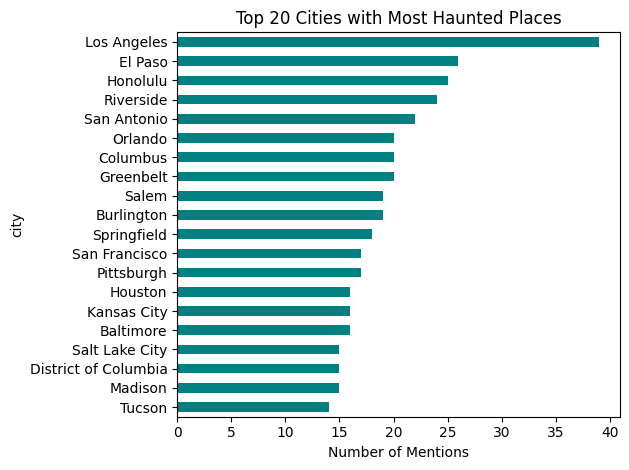

In [6]:
# Top 20 most haunted cities (based on number of mentions)
top_cities = geo_df['city'].value_counts().nlargest(20)

# Plot
top_cities.plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title('Top 20 Cities with Most Haunted Places')
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.show()


## Haunted Places Per City

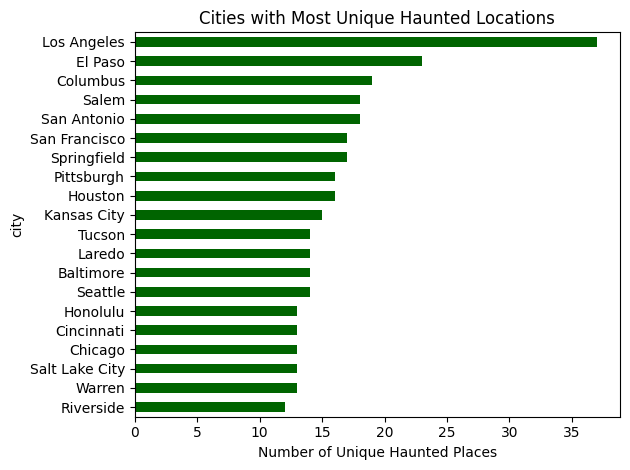

In [7]:
# Count unique haunted places per city (based on 'location')
haunted_per_city = geo_df.groupby('city')['location'].nunique().sort_values(ascending=False).head(20)

# Plot
haunted_per_city.plot(kind='barh', color='darkgreen')
plt.gca().invert_yaxis()
plt.title('Cities with Most Unique Haunted Locations')
plt.xlabel('Number of Unique Haunted Places')
plt.tight_layout()
plt.show()


## Multi-Haunting Cities: Cities With > 1 Haunted Site
Create a filtered list of cities with more than one haunted place — could be used to map or analyze trends

In [8]:
multi_haunt_cities = df.groupby('city')['location'].nunique()
multi_haunt_cities = multi_haunt_cities[multi_haunt_cities > 1].sort_values(ascending=False)

print("Number of cities with more than 1 haunted place:", len(multi_haunt_cities))
multi_haunt_cities.head(10)


Number of cities with more than 1 haunted place: 1696


city
Los Angeles    58
San Antonio    50
Columbus       39
Pittsburgh     38
Salem          38
Springfield    35
El Paso        34
Houston        34
Laredo         32
Chicago        30
Name: location, dtype: int64

## Correlating City and Description Themes
Check if certain keywords or haunt types appear more in certain cities.

In [12]:

# Step 2: Get top N cities by haunted location mentions
top_cities = geo_df['city'].value_counts().nlargest(10).index.tolist()

# Step 3: Extract top keywords in descriptions per top city
city_keywords = {}

# Basic stopwords for cleanup
stopwords = set([
    'the', 'and', 'in', 'of', 'a', 'to', 'is', 'with', 'for', 'on', 'that',
    'at', 'by', 'an', 'from', 'as', 'it', 'this', 'you', 'was', 'are', 'has',
    'be', 'but', 'not', 'they', 'have', 'been', 'their', 'or', 'its', 'which',
    'his', 'her', 'them', 'one', 'had', 'were', 'he', 'she'
])

for city in top_cities:
    descriptions = ' '.join(df[df['city'] == city]['description'].dropna().tolist())
    words = re.findall(r'\b[a-z]{4,}\b', descriptions.lower())  # words with 4+ letters
    filtered = [w for w in words if w not in stopwords]
    top_words = Counter(filtered).most_common(10)
    city_keywords[city] = top_words

# Step 4: Display the results
for city, keywords in city_keywords.items():
    print(f"\n--- Top keywords in {city} haunted place descriptions ---")
    for word, count in keywords:
        print(f"{word}: {count}")



--- Top keywords in Los Angeles haunted place descriptions ---
there: 55
floor: 35
when: 31
school: 31
building: 25
room: 24
seen: 21
night: 17
other: 17
also: 16

--- Top keywords in El Paso haunted place descriptions ---
there: 39
said: 18
school: 16
night: 15
when: 13
room: 13
hall: 12
will: 11
back: 11
place: 10

--- Top keywords in Honolulu haunted place descriptions ---
there: 25
seen: 18
when: 18
night: 15
also: 14
said: 13
woman: 12
people: 12
drive: 12
ghost: 11

--- Top keywords in Riverside haunted place descriptions ---
room: 17
there: 12
when: 12
hotel: 11
catacombs: 10
night: 10
said: 10
after: 9
building: 9
also: 9

--- Top keywords in San Antonio haunted place descriptions ---
there: 49
said: 23
will: 20
seen: 19
night: 19
when: 19
your: 19
haunted: 15
children: 15
many: 14

--- Top keywords in Orlando haunted place descriptions ---
there: 26
seen: 14
room: 10
also: 9
when: 9
around: 8
will: 8
many: 7
down: 7
floor: 7

--- Top keywords in Columbus haunted place descrip

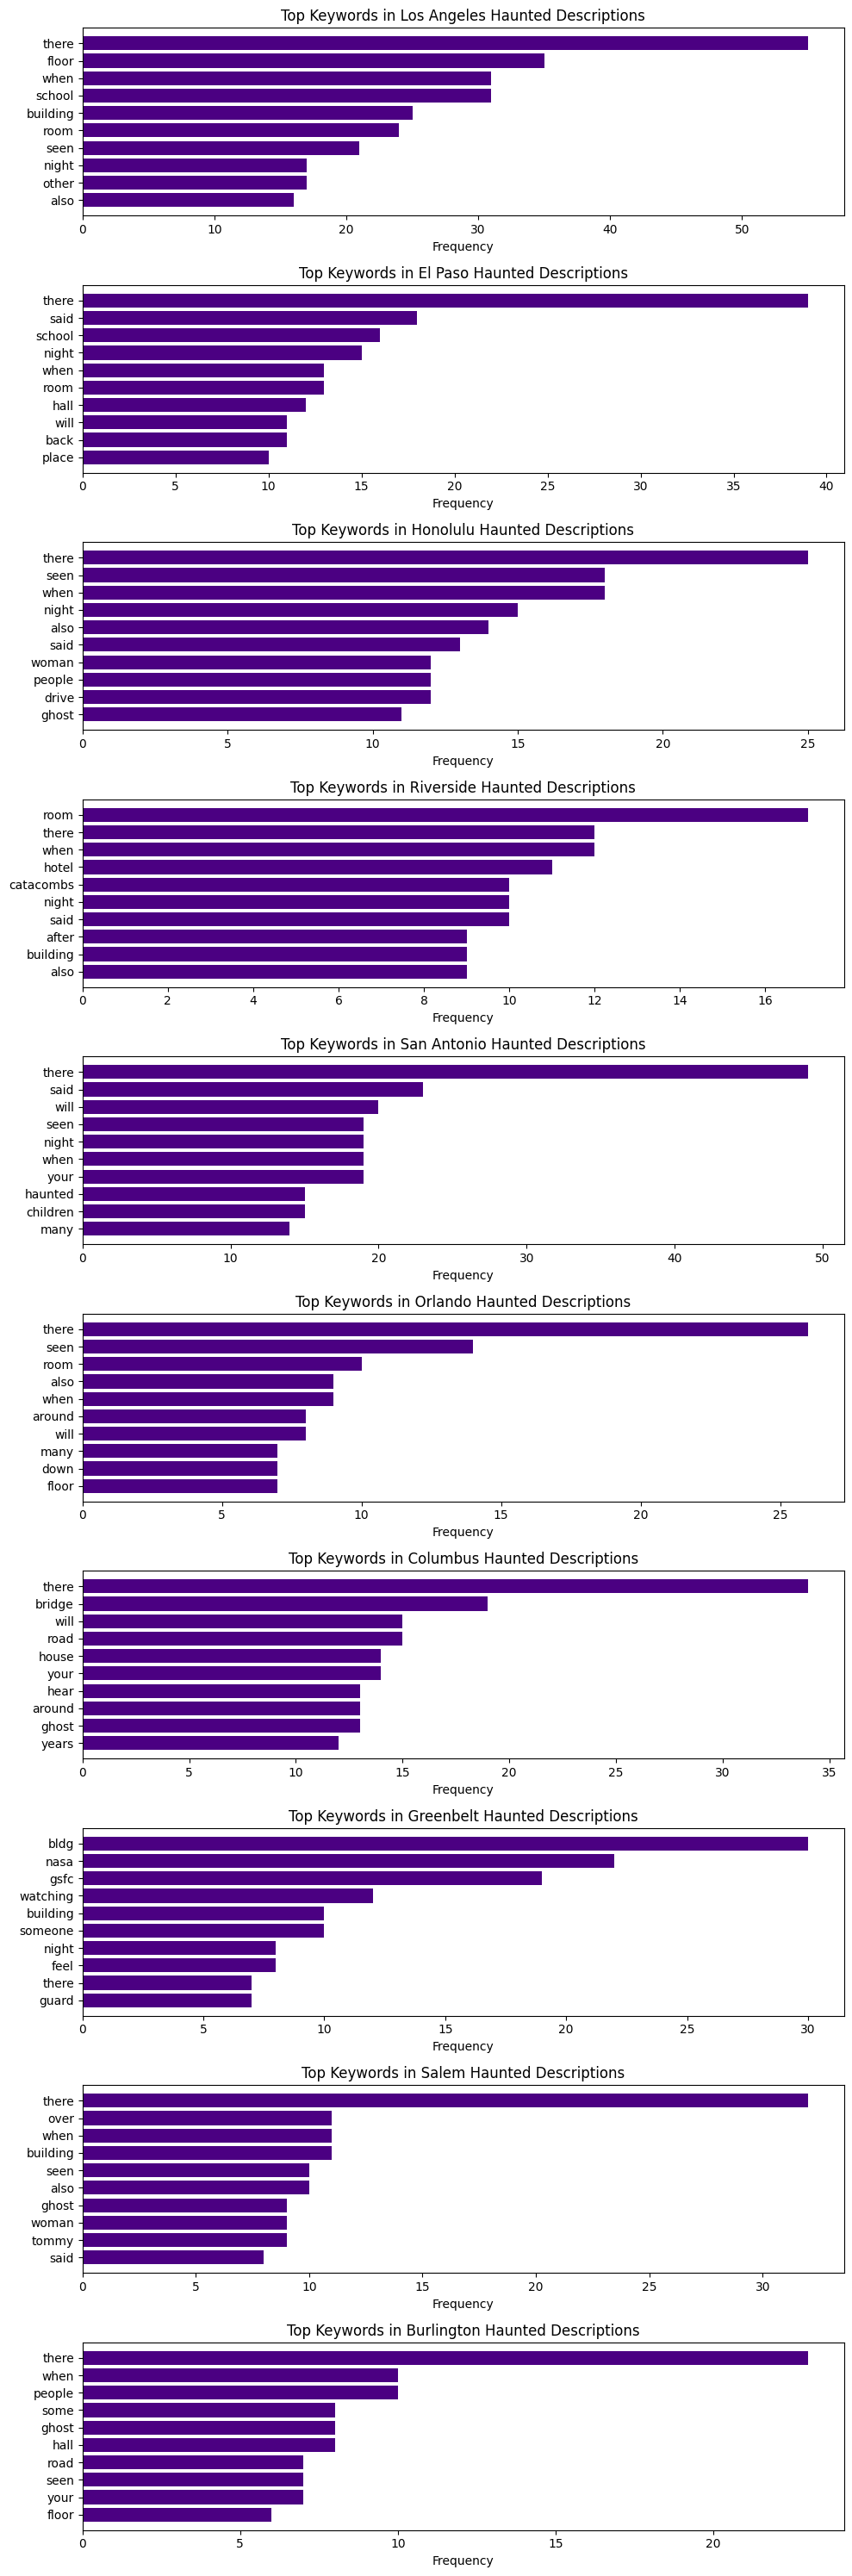

In [13]:
num_cities = len(city_keywords)
fig, axes = plt.subplots(nrows=num_cities, ncols=1, figsize=(10, 3 * num_cities))

if num_cities == 1:
    axes = [axes]  # Make iterable if just one

# Plot each city's keywords
for ax, (city, keywords) in zip(axes, city_keywords.items()):
    words, counts = zip(*keywords)
    ax.barh(words, counts, color='indigo')
    ax.set_title(f"Top Keywords in {city} Haunted Descriptions")
    ax.invert_yaxis()
    ax.set_xlabel("Frequency")

plt.tight_layout()
plt.show()
